# Homework 5 - The Marvel Universe!

- Matteo Candi
- Enrico Grimaldi
- Matteo Migliarini

**Data Cleaning**

To clean the datasets we followed the following steps:
- apply a function that remove extra spaces or "/" if a cell ended with these characters;
- given that in the "hero_network" dataset the heroes names are composed by a maximum of 20 characters, we cut the heroes name in the others two datasets to the same maximum value to match all the heroes putting together the datasets;
- we remove the self-loop in "hero_network" dataset beacause they are useless for our analysis.

**First Graph**

For this function use hero_network dataset.

The number of *nodes* is the same of the unique heroes in all the dataset and *edges* are weighted with $w_{AB} = \frac{1}{n_{AB}}$ where $n_{AB}$ is the number of edges between node A and node B and $w_{AB}$ the weight of the single edge between these nodes.

The created graph is `undirected` and `weighted` and there are no self-loops or multiple edges.

In [1]:
from functions import load_graph_1

**Second Graph**

For this function we need the dataset with nodes and the one with edges to generate the graph. All the nodes have the "type" attribute (hero or comic) given in the nodes datset.

The graph is `undirected` and `unweighted`.

In [2]:
from functions import load_graph_2

**Top N Heroes Filter**

We use this function to reduce the graph data and use only the top N heroes (the ones that appeared most in the comics). In the second graph we leave also all the comics that have an edge with these heroes, removing isolated nodes.

In [3]:
from functions import top_N_filter

---

In [212]:
import networkx as nx
import pandas as pd
from scipy import stats
from collections import Counter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from random import sample
from matplotlib.cm import get_cmap
from functions import load_graph_1, load_graph_2, top_N_filter
%load_ext autoreload
%autoreload 2

graph1 = load_graph_1()
graph2 = load_graph_2()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
graph1.edges['CAPTAIN AMERICA','IRON MAN/TONY STARK']

{'weight': 0.002242152466367713}

## Functionality and Viz 1

In [5]:
def func1(graph, type, N=-1):
    graph = top_N_filter(graph, N)
    
    node_number = len(graph)
    if type==1:
        collab = dict(graph.degree)
    elif type==2:
        collab = dict(filter(lambda k: graph.nodes[k[0]]['type'] == 'comic', dict(graph.degree).items()))
    
    density = nx.density(graph)
    
    degree_count = Counter(dict(graph.degree).values())
    probs = np.array(list(degree_count.values()))/sum(degree_count.values())
    values = np.array(list(degree_count.keys()))
    pmf = stats.rv_discrete(name='degree', values=(values, probs))
    avg = pmf.mean()
    
    p95 = pmf.ppf(.95)
    hubs = [n for n,v in graph.degree if v >= p95]
    
    is_dense = density > 0.05
    
    return node_number, collab, density, pmf, avg, hubs, is_dense

First visualization for graph #1

| Number of nodes | Density | Average degree | Is dense |
|-----------------|---------|----------------|----------|
|            1000 |   0.123 |        123.136 | True     |


,Hubs
0,HUMAN TORCH/JOHNNY S
1,THING/BENJAMIN J. GR
2,MR. FANTASTIC/REED R
3,INVISIBLE WOMAN/SUE
4,SPIDER-MAN/PETER PAR
5,"WATSON-PARKER, MARY"
6,"JAMESON, J. JONAH"
7,CAPTAIN AMERICA
8,IRON MAN/TONY STARK
9,SCARLET WITCH/WANDA


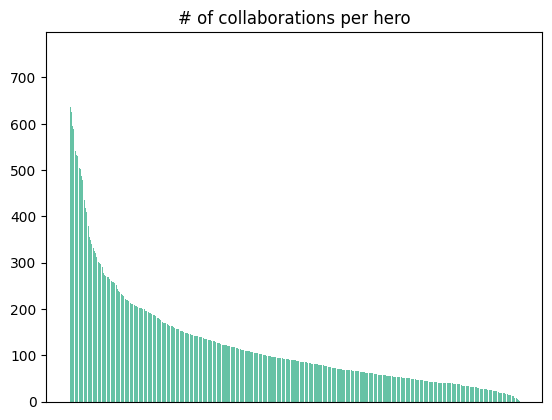

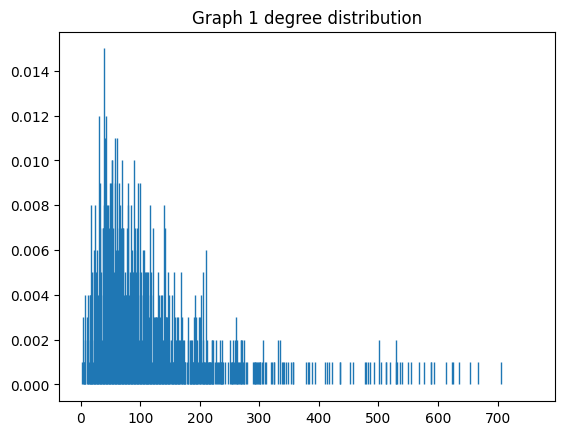

In [53]:
from visualizations import viz1

viz1(graph1, 1, 1000)

### Viz1 for graph #2

| Number of nodes | Density | Average degree | Is dense |
|-----------------|---------|----------------|----------|
|           13367 |   0.001 |         11.355 | False    |


,Hubs
0,COC 1
1,ABOMINATION/EMIL BLO
2,H2 278
3,SWII 7
4,ABSORBING MAN/CARL C
...,...
683,X-MAN/NATHAN GREY
684,YELLOW CLAW/TZING JA
685,ZABU
686,"ZARRKO, ARTHUR"


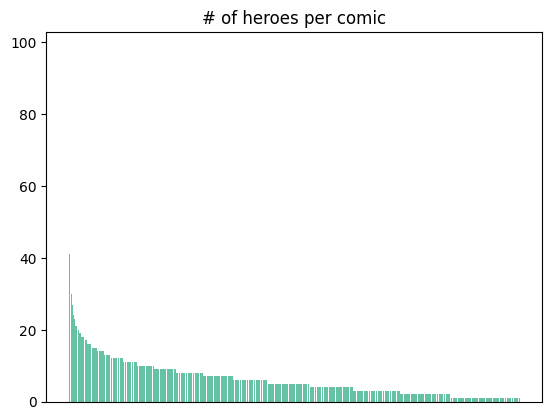

range(1, 1577)


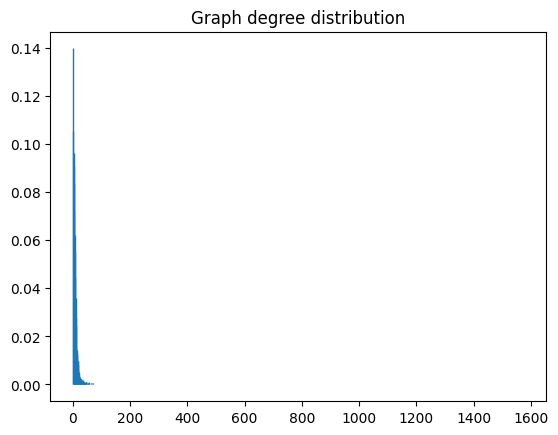

In [6]:
viz1(graph2, 2, 1000)

## Functionality and visualization 2

#### Brief introductoin to centrality - <a href="https://cambridge-intelligence.com/keylines-faqs-social-network-analysis/" >Source</a>


The concept of _centrality_ in networks (thus in graphs) is crucial for analyzing the most relevant factors, revealing the parts of the network that need the most attention.

We have different types of centrality that represent a different characteristic of a node in a network:

1. **Degree centrality** assigns an importance score based simply on the number of links held by each node, i.e. how many direct connections each node has to other nodes in the network. In our case is very useful for finding very connected (popular) heroes. So this centrality is high for heroes with more collaborations or antagonists/rivals and that appear in many comics. Formal definition:
$$Degree\_ centrality(v) = \frac{degree(v)}{(n-1)}$$


2. **Betweenness centrality** measures the number of times a node lies on the shortest path between other nodes. This measure shows which nodes are ‘bridges’ between nodes in a network. It is useful for finding the individuals who influence the flow around a system but we have to pay attention: a high betweenness count could indicate someone holds authority over disparate clusters in a network, or just that they are on the periphery of both clusters. So we could find some hero that has an high centrality simply because makes an appearance in many comic books but it is not a properly a fundamental node. Formal definition:
$$Betweenness\_ centrality(v) = \sum_{u,v \in V} \frac{g_{v}(u,v)}{g(u,v)} \cdot \frac{(n-1)(n-2)}{2} \space, \space\space\space g_{v}(u,v)= shortest\_ path(u-v) \space that \space passes \space through \space v\space, \space\space\space g(u,v)= shortest\_ path( u-v ) $$


3. **Closeness centrality** scores each node based on their ‘closeness’ to all other nodes in the network. This measure calculates the shortest paths between all nodes, then assigns each node a score based on its sum of shortest paths. It is useful for finding the individuals who are best placed to influence the entire network most quickly and can help find good ‘broadcasters’, but in a highly-connected network, you will often find all nodes have a similar score. Fortunately, in our case we have a sparse graph ( density << 0.5) so this metric is positively discriminating. Formal definition:
$$Closeness\_ centrality(v) = \frac{(n-1)}{\sum_{u \in V} distance(v, u)} \space, \space\space\space distance(v, u)=  number\space of\space edges\space between\space nodes\space v\space and\space u $$

4. **PageRank centrality** assigns nodes a score based on their connections, and their connections’ connections (simulating the citation system in academic papers). This measure uncovers nodes whose influence extends beyond their direct connections into the wider network. Because it takes into account direction and connection weight, PageRank can be helpful for understanding citations and authority, i.e. dead end pages (no links).

In [7]:
from functions import clean_comm

#### 'functionality_2' description

Input:

>- a graph
>- a node
>- One of the given metrics : Betweeness , PageRank, ClosenessCentrality , DegreeCentrality (a string)
>- an integer N: denoting the top N heroes that their data should be considered

Output:

>- The metric's value over the considered graph
>- The given node's value

In [8]:
def functionality_2(graph, node, metric, N=6439):

    graph = top_N_filter(graph, N)

    metric = clean_comm(metric)
    result = eval(f'nx.{metric}(graph)[node]')
    return (node, result)

Now we evaluate every type of centrality for the node correspondent to Spider Man

In [9]:
node = "SPIDER-MAN/PETER PAR"
centr_types = ["Degree", "Betweenness", "Closeness", "Pagerank"]
centr_measures = []
print(f'Centrality for the node {node}')

for centr in centr_types:
    measure = functionality_2(graph1, node, centr)[1]
    centr_measures.append(measure)
    print(f'{centr} centrality: {measure}')

Centrality for the node SPIDER-MAN/PETER PAR
Degree centrality: 0.2705607476635514
Betweenness centrality: 0.07358526356259767
Closeness centrality: 0.5741568906637035
Pagerank centrality: 0.004745481147019864


To give a further explanation about how centrality measures work in our particular network we do some consideration and then we observe some pratical example picking the centrality values for the "most popular" hero... Spider Man!

In our case we can consider the _graph1_ given in input to _functionality2_ as a proper **social network**. Thus, finding the heroes with some kind of high centrality, we are able to find individuals with a relative importance/influence over their context (the Marvel Universe).

We can draw the following conclusions looking at our example above:

>- The **degree centrality** gives a first raw definition of popularity based on the number of collaborations that a hero has. We can see that this is likely to turn out to be lower than other measures at the time when the hero makes an appearance in very few comic books or few other heroes appear in the comic books in which he is featured. Note that in this case no weight is given to the importance of individual hero collaboration.

>- In the case of **betweenness centrality** we can see a much lower value than the previous one. In fact, this one identifies the importance of an individual in terms of authority in multiple stories (comics) that cannot be attributed to the same cluster. Clearly Spider man does not turn out to be a good bridge between clusters of heroes.

>- **Closeness centrality**, on the other hand, is particularly high for heroes who have very high effective influence as they are able to reach other nodes with greater speed. In that case, such a measure not only reflects how many direct relationships Spider man has been able to build over time (as in the case of degree centrality) but also how much indirect knowledge with few degrees of separation he is able to boast. In the reduced graph, however, we have a certain degree of sparsity, and this centrality takes on distinct values at the various nodes.

>- Finally, the **pagerank centrality** derives in turn from the **Eigen centrality**, which takes the closeness centrality a step further by also taking into consideration the degree to which a node is connected, the number of links and so on across the network. In this case seems that Spider man is pretty popular but have not that much links with other "popular" heroes.

#### Visualization time

Visualizing our results in tabular form with threee columns:
>- node name;
>- centrality measure of that specific node;
>- average centrality over all the network's nodes.

In [10]:
from visualizations import centr_table

centrality_tab = pd.DataFrame(centr_table(graph1, "degree", 100))
centrality_tab.head(10)

,node,centrality,avg
0,ANGEL/WARREN KENNETH,0.979798,0.814141
1,ANT-MAN/DR. HENRY J.,0.939394,0.814141
2,"BANNER, BETTY ROSS T",0.767677,0.814141
3,BEAST/HENRY &HANK& P,0.979798,0.814141
4,BLACK KNIGHT V/DANE,0.909091,0.814141
5,BLACK PANTHER/T'CHAL,0.888889,0.814141
6,BLACK WIDOW/NATASHA,0.969697,0.814141
7,"CAGE, LUKE/CARL LUCA",0.919192,0.814141
8,CAPTAIN AMERICA,1.000000,0.814141
9,CAPTAIN BRITAIN/BRIA,0.838384,0.814141


<Figure size 640x480 with 0 Axes>

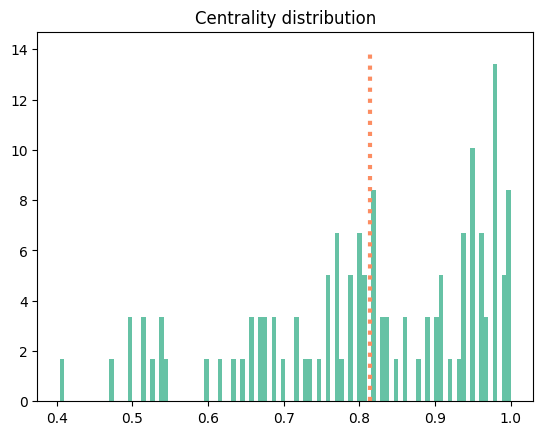

In [11]:
plt.hist(centrality_tab.centrality, density=True, bins = centrality_tab.shape[0], color=plt.cm.Set2(0))
plt.title("Centrality distribution")
plt.vlines( x = centrality_tab.avg[1], ymin=0, ymax=14,
           colors = plt.cm.Set2(1), ls=':', lw=3,
           label = 'vline_multiple - full height')
 
plt.show()

Let's proceed with a comparision about the different types of centrality for the top 10 heroes to confirm what we claimed before.

In [12]:
centrality_tab1 = pd.DataFrame(centr_table(graph1, "degree", 100))
centrality_tab2 = pd.DataFrame(centr_table(graph1, "betweenness", 100))
centrality_tab3 = pd.DataFrame(centr_table(graph1, "closeness", 100))
centrality_tab4 = pd.DataFrame(centr_table(graph1, "pagerank", 100))

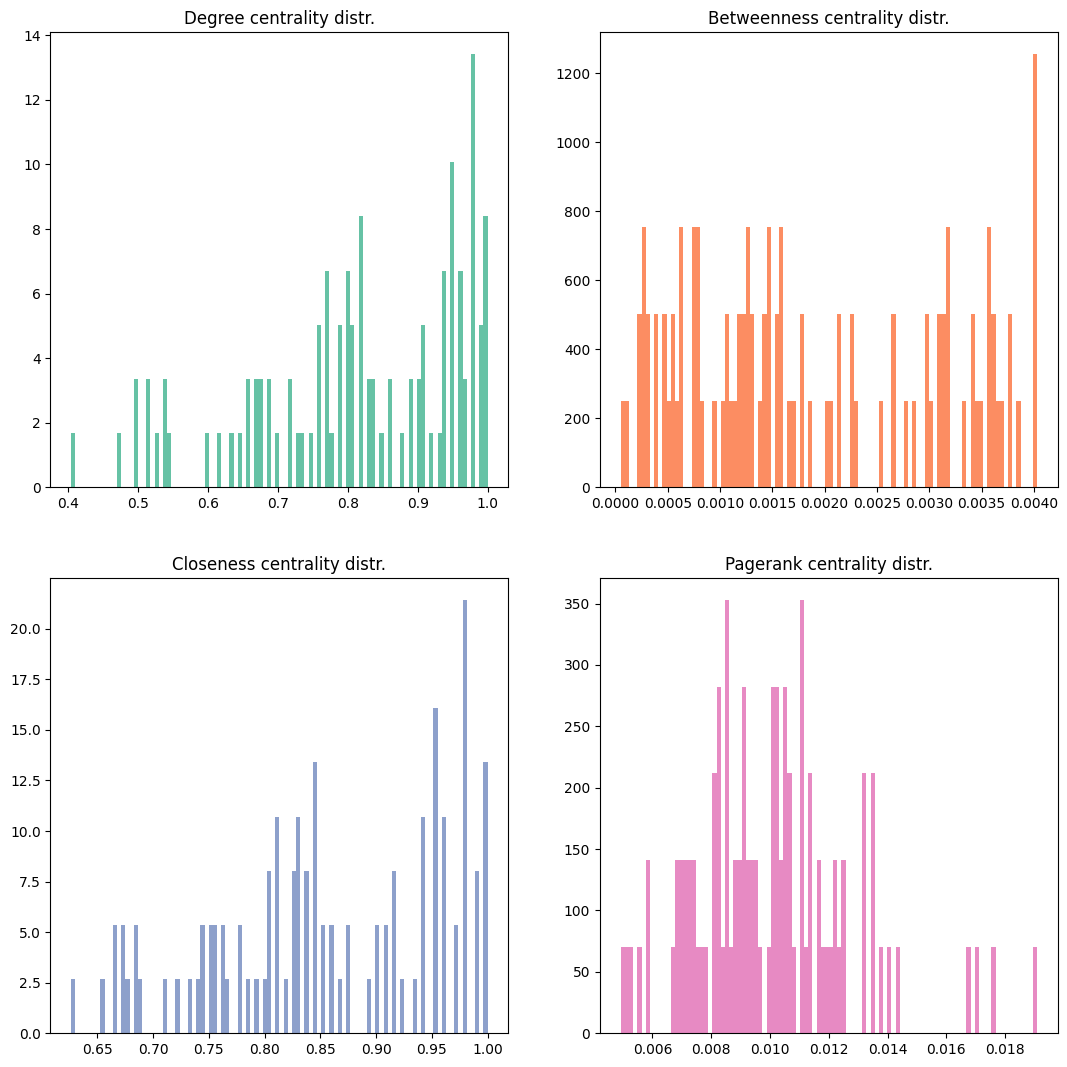

<Figure size 10000x800 with 0 Axes>

In [13]:
figure, axis = plt.subplots(2, 2, figsize=(13, 13))
plt.figure(figsize=(100, 8))
axis[0, 0].hist(centrality_tab1.centrality, density=True, bins = centrality_tab1.shape[0], color=plt.cm.Set2(0))
axis[0, 0].set_title("Degree centrality distr.")
  
axis[0, 1].hist(centrality_tab2.centrality, density=True, bins = centrality_tab2.shape[0], color=plt.cm.Set2(1))
axis[0, 1].set_title("Betweenness centrality distr.")
  
axis[1, 0].hist(centrality_tab3.centrality, density=True, bins = centrality_tab3.shape[0], color=plt.cm.Set2(2))
axis[1, 0].set_title("Closeness centrality distr.")
  
axis[1, 1].hist(centrality_tab4.centrality, density=True, bins = centrality_tab4.shape[0], color=plt.cm.Set2(3))
axis[1, 1].set_title("Pagerank centrality distr.")
  
plt.show()

In [14]:
print("Average centrality levels by type")
print(f'average degree centrality: {round(centrality_tab1.avg[1],2)}')
print(f'average betweenness centrality: {round(centrality_tab2.avg[1],2)}')
print(f'average closeness centrality: {round(centrality_tab3.avg[1],2)}')
print(f'average pagerank centrality: {round(centrality_tab4.avg[1],2)}')

Average centrality levels by type
average degree centrality: 0.81
average betweenness centrality: 0.0
average closeness centrality: 0.86
average pagerank centrality: 0.01


Note copme in the reduced graph case this is particularly dense and the remaining heroes exhibit high closeness and degree centrality. Pagerank and betweenness, on the other hand, lose significance the moment the graph loses many nodes and "clusters" of heroes.

## Functionality and Visualization 3

As input of our **_Functionality 3_** we need a value of N to run our function only on the graph with top N heroes. This imply that if we use as input for **h_1**, **h** and **h_n** some heroes that are not in the top N, the algorithm cannot run. Given this we can use the following function to extract randomly these three values from the list of the top N heroes or otherwise the **_Functionality 3_** will check if all the heroes are in the given graph of top N; if that doesn't happen the function will return the message: "`Not all the heroes are in the graph! Try to increase N`".

In [15]:
def set_h(graph2, len_h, N= 6439):

    # Condition on dimension of the sequence compared number N of heroes.
    if len_h + 2 > N:
        print('N too low or len_h too high! Try to change values')
        return 0, [0], 0

    # List of top N heroes.
    graph = top_N_filter(graph2, N, remove_isolates=True)
    heroes = [node[0] for node in graph.nodes(data=True) if node[1]['type'] == 'hero']

    # Take randomly first hero.
    h_1 = sample(heroes, 1)[0]
    heroes.remove(h_1)

    # Take randomly last hero.
    h_n = sample(heroes, 1)[0]
    heroes.remove(h_n)

    # Take randomly the heroes in the middle.
    h = sample(heroes, len_h)

    return h_1, h, h_n

The **_Functionality 3_** search for the shortest path for each couple of consecutive heroes (step by step from h_1 to h_n passing consecutively through all the element of h). If some of this path does not exists it mean that we are trying to go from two different component of the graph that are not connected; in this case the function will return the message "`There is no such path`".

In [16]:
def functionality_3(graph2, h, h_1, h_n, N=6439):

    # Keep only the top N heroes.
    graph = top_N_filter(graph2, N, remove_isolates=True)

    # Check if all the heroes of the list are in the graph.
    seq = [h_1] + h + [h_n]
    if not all(i in graph.nodes() for i in seq):
        print("Not all the heroes are in the graph! Try to increase N")
        return -1

    # Find all the intermediate shortest paths.
    path = []
    for pos in range(len(seq)-1):
        source = seq[pos]
        target = seq[pos+1]
        try:
            new_step = nx.shortest_path(graph, source, target)

            # Check if the shortest path do not pass for nodes that appear later in list.
            if len(set(seq[pos+2:]).intersection(new_step)) == 0:
                path.extend(new_step[1:])
            else:

                # Find all the shortest paths and take the first that pass the condition.
                step_list = nx.all_shortest_paths(graph, source, target)
                for step in step_list:
                    if len(set(seq[pos+2:]).intersection(new_step)) == 0:
                        path.extend(step[1:])
                        break

        except:
            print("There is no such path")
            return 0
        
    # Take only the comics that the shortest path visits.
    comics = [step for step in path if graph.nodes[step]['type'] == 'comic']

    # Remove a comic if appears more than one time consecutively.
    comics = [comic for pos,comic in enumerate(comics[:-1]) if comic != comics[pos+1]] + [comics[-1]]

    print(f'The comics path from {h_1} to {h_n} is: {comics}')

    return [h_1] + path

The **_Visualization 3_** function take as input the same values of **_Functionality 3_** beacause it is used within it: the shortest path that pass for all the sequence of heroes is returned and this function basically plot this path after create the graph, assign the attribute "type" to each node and set the node color based on this value. The graph present on the left all the comics and on the right all the heroes.

In [29]:
from visualizations import visualization_3

*Example output using top 100 heroes and a random path of 9 heroes*.

The comics path from IRON MAN IV/JAMES R. to JUBILEE/JUBILATION L is: ['M/SHSW 1', 'SWII 7', 'WOSM 73', 'ASM 23', 'XCAL 53', 'COC 1', 'NM 6', 'UX 375']


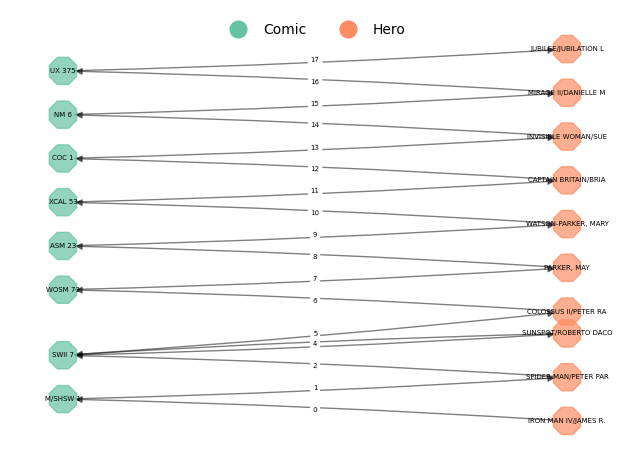

In [31]:
N = 100
h_1, h, h_n = set_h(graph2, len_h=7, N=N)

visualization_3(graph2, h, h_1, h_n, N=N)

## Functionality and Visualization 4

#### `functionality_4` description

Input:

>- The graph data
>- heroA: a superhero to which will relate sub-graph G_a
>- heroB: a superhero to which will relate sub-graph G_b
>- N: denoting the top N heroes that their data should be considered

Output:
>- The minimum number of links (by considering their weights) required to disconnect the original graph in two disconnected subgraphs: G_a and G_b;
>- the two connected components that derive from the original graph.

In [70]:
def functionality_4(graph, heroA, heroB, N=6439):

    # reducing the dimension of the original graph
    graph = top_N_filter(graph, N)

    # removing the min cut (max flow) between the two nodes
    min_cut = list(nx.minimum_edge_cut(graph, s=heroA, t=heroB, flow_func=None))
    graph.remove_edges_from(min_cut)

    # create two copies of the disconnected graph
    graphA = graph.copy()
    graphB = graph.copy()

    # evaluate the diwsconnected components (nodes)
    nodesA = nx.node_connected_component(graph, heroA)
    nodesB = nx.node_connected_component(graph, heroB)

    # remove nodes not owned by the connected component and create two separate graphs
    graphA.remove_nodes_from(nodesB)                                                                                                                                                    
    graphB.remove_nodes_from(nodesA)  
    
    return (min_cut, graphA, graphB)

To disconnect the graph we have to remove 9 links


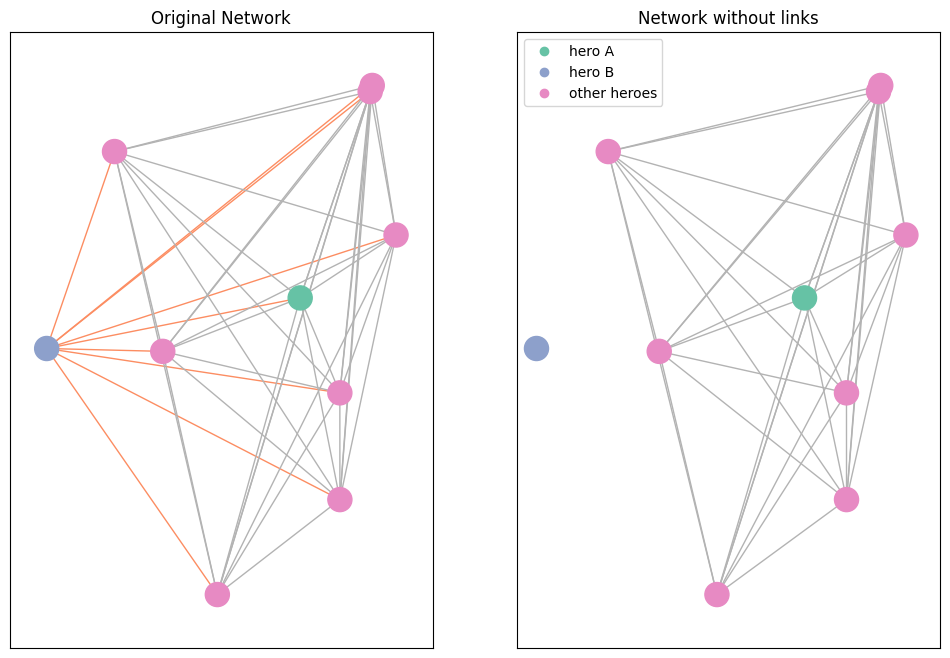

In [79]:
from visualizations import vis_4

vis_4(graph1, 'INVISIBLE WOMAN/SUE' , 'HUMAN TORCH/JOHNNY S', N=10)

## Functionality and Visualization 5
A community, with respect to graphs, can be defined as a subset of nodes that are densely connected to each other and loosely connected to the nodes in the other communities in the same graph. 

If a graph is **disconnected** (i.e. has more than one connected component), then the communities are the connected components of the graph. If it's not disconnected than we can remove some edges one at a time by following the **Girvan-Newman** algorithm until the graph has more than one connected component.

In [50]:
def func5(graph, hero1, hero2, N=-1, k=2):
    '''K: number of comunities'''
    graph = top_N_filter(graph, N)
    
    cc = nx.number_connected_components(graph)
    removed_edges = 0
    while cc < k:
        edges_to_remove = most_ebc(graph)
        graph.remove_edges_from(edges_to_remove)
        if cc == 1:
            removed_edges += len(edges_to_remove)
        cc = nx.number_connected_components(graph)
        
    cc = list(nx.connected_components(graph))
    
    same_community = any([hero1 in community and hero2 in community for community in cc])
        
    return removed_edges, cc, same_community
    
def most_ebc(graph):
    '''Selects all edges which have maximum ebc'''
    ebc = nx.edge_betweenness_centrality(graph)
    M = max(ebc.values())
    edges = list(filter(lambda a: ebc[a] == M, ebc.keys()))
    return edges

We can then visualize this on a small dummy graph:

Minimum number of links to be removed: 5


Communities:


,0,1,2,3,4
0,0,10,20,32,40
1,1,11,21,33,41
2,2,12,22,34,42
3,3,13,23,35,43
4,4,14,24,36,44
5,5,15,25,37,45
6,6,16,26,38,46
7,7,17,27,39,47
8,8,18,28,30,48
9,9,19,29,31,49


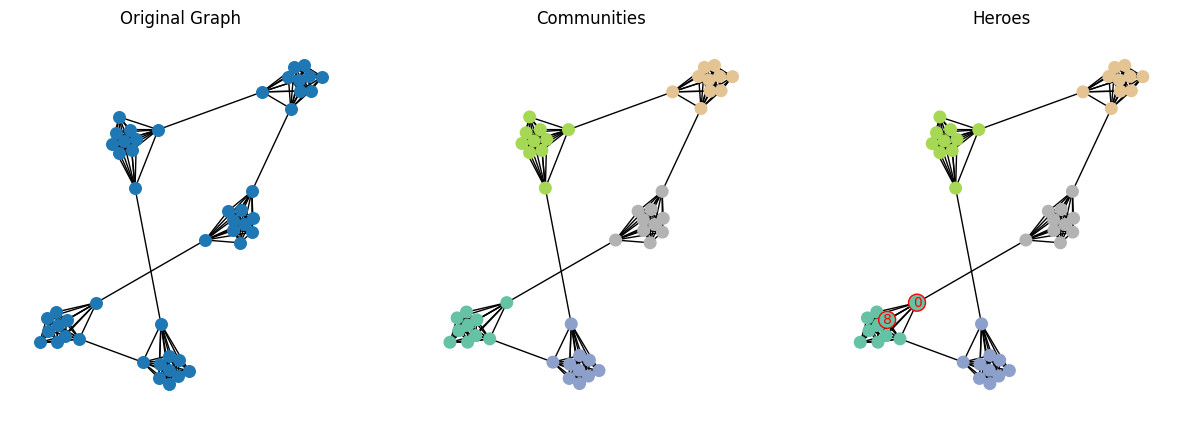

In [51]:
from visualizations import viz5

viz5(nx.connected_caveman_graph(5,10), 0, 8)

And finally on the whole super hero network:

Minimum number of links to be removed: 0


Communities:


,0,1,2,3
0,RED RAVEN II,"ASHER, MICHAEL",SWORDSMAN IV,STEEL SPIDER/OLLIE O
1,FOOLKILLER/ROSS EVER,"ASHER, CARL",AMAZO-MAXI-WOMAN,MASTER OF VENGEANCE
2,VOLKHVY,ORWELL,MANT/ERNEST,<NA>
3,MAGNETO | MUTANT X-V,OSWALD,STERLING,<NA>
4,SICKLE II,"ASHER, DONNA",PANTHER CUB,<NA>
...,...,...,...,...
6397,MADAME QWA,<NA>,<NA>,<NA>
6398,PREYY,<NA>,<NA>,<NA>
6399,SOUL-EATER,<NA>,<NA>,<NA>
6400,GUARDIAN III,<NA>,<NA>,<NA>


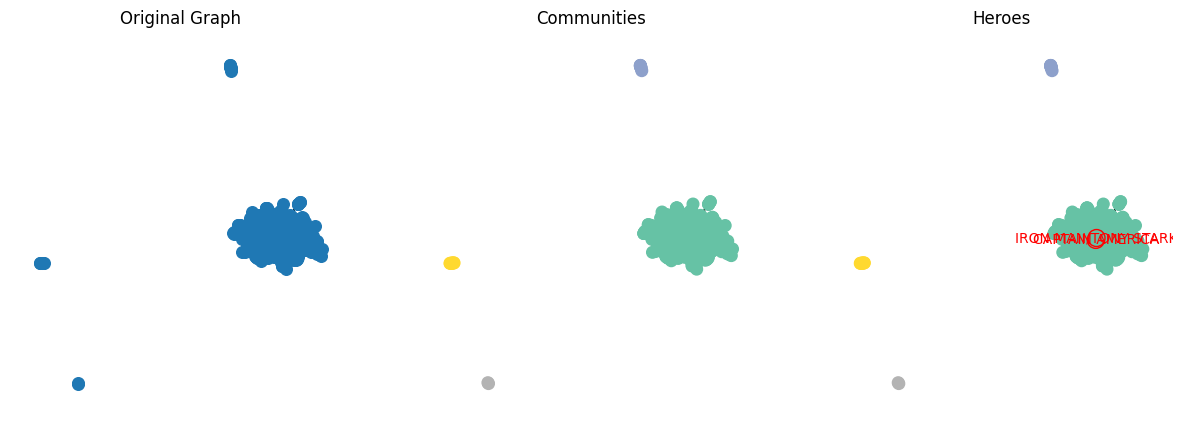

In [52]:
viz5(graph1, 'CAPTAIN AMERICA','IRON MAN/TONY STARK')

But we note that the superhero network has already 4 disconnected components by itself, so the Girvan-Newman algorithm isn't used at all. We can try again to run the functionality, but only on the biggest connected component:

Minimum number of links to be removed: 20


Communities:


,0,1
0,TUSK,MERREE
1,RALF,DR. MIDAS
2,"PENNINGTON, AUDRA",MARVEL BOY VIII/NOH-
3,FARAHD,PLEX INTELLIGENCE
4,RISQUE/GLORIA,OUBLIETTE
...,...,...
6391,"ROBERTSON, RANDY",<NA>
6392,EGO-PRIME,<NA>
6393,RAPUNZEL,<NA>
6394,DOMINO II,<NA>


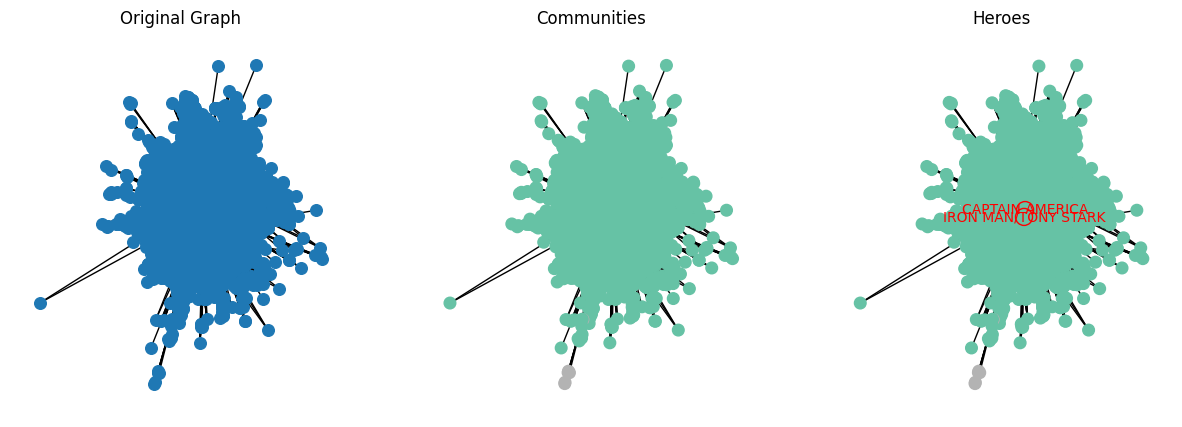

In [42]:
connected_components = [graph1.subgraph(c).copy() for c in nx.connected_components(graph1)]

viz5(connected_components[0], 'CAPTAIN AMERICA','IRON MAN/TONY STARK')

Even now we note that the community that are found are one very big community and a smaller one. This is because the graph is densely connected, as seen in Viz#1, and therefore there are no clearly defined communities, but rather many small superheroes gravitating around the main ones.

## Bonus
We're going to use the first version of the algorithm described [here](https://www.cs.utah.edu/~jeffp/teaching/cs5140-S15/cs5140/L24-MR+PR.pdf).

We are going to use $k=100$, and $\beta=0.85$. Setup: 

In [221]:
k = 100
beta = 0.85
M = nx.adjacency_matrix(graph1, weight='weight')
M.data = 1/M.data
M /= M.sum(axis=1)
M = np.array(M)
n = M.shape[0]
q = np.ones((1,n)) * 1/n
blocksize = int(n // k)

C:\Users\Archimede\AppData\Local\Temp\ipykernel_6148\2940451796.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  M = nx.adjacency_matrix(graph1, weight='weight')


We divide $M$ into $k$ stripes, then in the mapper we multiply each of them with the corresponding values of $q$ (which is the vector of probabilities). 

In the reducer we take the results of the mapper and we just sum them.

In [223]:
# We divide M into k row stripes
blocks = {i//blocksize:M[i:i+blocksize] for i in range(0, n, blocksize)}

for t in range(0,70):
    q_blocks = {i//blocksize: q[:,i:i+blocksize] for i in range(0,n,blocksize)}

    # Mapper:  matrix multiplication
    mapped = list(map(lambda i: q_blocks[i] @ blocks[i] , range(0,k)))
    
    # Reducer: sum 
    q = np.sum(mapped, axis=0) * beta + (1-beta)/n

Finally, the top 10 most import super heroes are:

## Command line

In [ ]:
%%bash
./CommandLine.sh

 appearing together 1267 times! "PATRIOT/JEFF MACE" and "MISS AMERICA/MADELIN"

Top 10 number of comics per superhero
   1577 SPIDER-MAN/PETER PARKER
   1334 CAPTAIN AMERICA
   1150 IRON MAN/TONY STARK
    963 THING/BENJAMIN J. GR
    956 THOR/DR. DONALD BLAK
    886 HUMAN TORCH/JOHNNY S
    854 MR. FANTASTIC/REED R
    835 HULK/DR. ROBERT BRUC
    819 WOLVERINE/LOGAN
    762 INVISIBLE WOMAN/SUE

The average number of heroes in comics is 7.59603!


# Algorithmic question
A scheme to intoduce our algorithm:

![img](Image/ADM_P34.png)

### Creating our graph

In [ ]:
# initialize the phone lock grid screen
G = nx.Graph()
G.add_nodes_from(np.arange(1,10)) # each node of our graph represetns a ponit                                  
edges = []                          # in the the lock scren
for i in G.nodes():
    neighbours = []                
    if i % 3 != 0:
        neighbours.append((i,i+1))
    if i not in [7,8,9]:
        neighbours.append((i,i+3))
    if i in [1,4,7]:
        neighbours.append((i,i+2))
    if i in [1,2,3]:
        neighbours.append((i,i+6))
        
    G.add_edges_from(neighbours)      # each edge correspond to a valid move


nodes = list(G.nodes())
edges = list(G.edges())


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


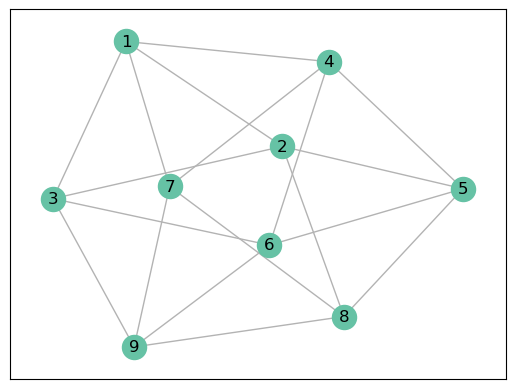

In [ ]:
plt.clf()
layout = nx.spring_layout(G)
nx.draw_networkx(G, layout, with_labels=True, node_color=plt.cm.Set2(0), edge_color= plt.cm.Set2(7))
plt.show()

### Designing the algorithm 

The algorithm essentially proceeds with two parallel recursive calls useful for carrying out single- or double-step movements when possible.
>- first we read the first letter of the string as input with the commands
>- then we translate the letter into two movements having the same direction but different step
>- we perform two checks: 
>> 1. one to verify that the node has not already been visited
>> 2. the other to understand whether the movement from the current node is actually legal (the corresponding edge exists in the graph)
>- if the above checks are satisfied we move the pointer to the destination node (we can have at most two destinations since I have two possible movement steps) and proceed with reading the next command. Note that we add intermediate nodes to the set of visited nodes if the movement step is double so as to avoid intersections
>- recursion stops if we can find a legal path derived from the entire sequence of input movements by incrementing the paths counter (base case of the recursion).

### Implementation

In [ ]:
def check_not_in(nodi, lista):
    lista = np.array(lista, dtype=np.int8)
    return np.all(np.isin(nodi, lista, invert=True) == True)


def find_path(node,edges, commands, step, vis, ):
    
    # base case of the recursion
    if len(commands)==0 and node not in vis:  # if we can read every command we found a valid pattern (path)
        vis.append(node)
        return 1 

    elif len(commands) == 0: # control in case we find a cycle at the last move -> this is not valid
        return 0
        
    # take the first command in our string with the sequence of commands
    command = commands[0]

    # check condition to go backwards in the path based on where we are in the recursion 
    if vis != []:
        try:
            idx = vis.index(node)
            vis = vis[:idx]
        except:
            vis = vis
    
    # notice that a step U or D conncets nodes with a distance 3 or 6 in terms of labels of nodes!
    # a step R or L connects nodes with distance 1 or 2 in terms of labels 
    # rember that the graph is built in order to avoid edges on "diagonal" direction

    # now accroding to the command we proceed with a particular "direction" on our screen
    if command == "U" :

        # pick the nodes where I pass through when moving on the "legal" direction
        next = np.array([node -3*step, node -3*int(step/2)] if step==2 else [node -3*step])

        # in order to avoid any cycle we control that the next node is not in the visited set of nodes
        # check if the move is a "legal" move, i.e. the edge between the current node and next does exist
        if check_not_in(next, vis) and (tuple(sorted((node, next[0]))) in edges):
            vis.append(node)   # add the current node to the list of visited nodes

            # do the same for the nodes that I need to overtake in order to reach the next position
            if len(next)>1:             
                vis.append(next[1])    # to control that we don't have any intersection on a specific pattern
            
            # proceed with the recursion both moving on the given direction with a single and a "double" step
            return find_path(next[0], edges, commands[1:], 1, vis) + find_path(next[0], edges, commands[1:], 2, vis) 

    elif command == "D":
        next = np.array([node +3*step, node +3*int(step/2)] if step==2 else [node +3*step])
        if check_not_in(next, vis) and (tuple(sorted((node, next[0]))) in edges):
            vis.append(node)
            if len(next)>1:  # note that this command works only in case of double-step move
                vis.append(next[1])
            return find_path(next[0], edges, commands[1:], 1, vis) + find_path(next[0], edges, commands[1:], 2, vis)
    
    elif command == "L":
        next = np.array([node -1*step, node -1*int(step/2)] if step==2 else [node -1*step])
        if check_not_in(next, vis) and (tuple(sorted((node, next[0]))) in edges):
            vis.append(node)
            if len(next)>1:
                vis.append(next[1])
            return find_path(next[0], edges, commands[1:], 1, vis) + find_path(next[0], edges, commands[1:], 2, vis)

    elif command == "R":
        next = np.array([node +1*step, node +1*int(step/2)] if step==2 else [node +1*step])
        if check_not_in(next, vis) and (tuple(sorted((node, next[0]))) in edges):
            vis.append(node)
            if len(next)>1:
                vis.append(next[1])
            return find_path(next[0], edges, commands[1:], 1, vis) + find_path(next[0], edges, commands[1:], 2, vis)

    return 0



def count_patt( commands, nodes, edges):

    # or commands that are not informative of any direction
    for c in commands:
        if c not in "RLUD":
            print(f'command {c} not valid!')
            return 0

    # count all the "possible" patterns given the commands
    count = 0
    for n in nodes:
        count += find_path( n,edges, commands, step=1, vis=[])
        count += find_path( n,edges, commands, step=2, vis=[])
    return count

Reporting some examples

In [ ]:
# reading in input the tentative commands
commands = input()
print(f'For the sequence of commands "{commands}" we have {count_patt(commands, nodes, edges)} possible paths.')

For the sequence of commands "DRU" we have 15 possible paths.


In [ ]:
commands = input()
print(f'For the sequence of commands "{commands}" we have {count_patt(commands, nodes, edges)} possible paths.')

For the sequence of commands "R" we have 9 possible paths.


In [ ]:
commands = input()
print(f'For the sequence of commands "{commands}" we have {count_patt(commands, nodes, edges)} possible paths.')

For the sequence of commands "LDRDRUL" we have 0 possible paths.
